# 1 - Introduction

SELECT  age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM `bigquery-public-data.ml_datasets.census_adult_income`
WHERE (workclass!=' ?' AND hours_per_week < 100)
LIMIT 27972;

(My Born Year is 1998, so 14 X 1998= 27972)

## Identity
<p> Name : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : Adult Income Dataset  </p>
<p> Objective : Predicting Income Bracket </p>

## Description
This data contains the identity of several adult in United States and their income. In the data that has been provided, there are the following column including in dataset: Age, Workclass, Education, Marital-status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss, Hours-per-week, Native-country, and income bracket. 

## Objective
Create a Classification model using Logistic Regression and SVM to predict the income bracket using the dataset that you have saved.

# 2 - Import Libraries

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Split
from bitarray import test
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix # Hapus yang tidak dipakai

from sklearn import datasets
from sklearn.svm import SVC

# 3 - Data Loading

In [106]:
# Display max column
pd.set_option("display.max.columns", None)

Uploading dataset continue by getting rid the space at the front oh each string value.

In [107]:
# Import data
df = pd.read_csv('h8dsft_P1G2_shafira_laksitasari.csv', skipinitialspace=True)
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27967,22,State-gov,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
27968,26,Private,Assoc-acdm,12,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
27969,47,Private,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
27970,59,Self-emp-not-inc,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [108]:
# Check Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27972 entries, 0 to 27971
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             27972 non-null  int64 
 1   workclass       27972 non-null  object
 2   education       27972 non-null  object
 3   education_num   27972 non-null  int64 
 4   marital_status  27972 non-null  object
 5   occupation      27972 non-null  object
 6   relationship    27972 non-null  object
 7   race            27972 non-null  object
 8   sex             27972 non-null  object
 9   capital_gain    27972 non-null  int64 
 10  capital_loss    27972 non-null  int64 
 11  hours_per_week  27972 non-null  int64 
 12  native_country  27972 non-null  object
 13  income_bracket  27972 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.0+ MB


The dataset consists of numerical and categorical. There is no null data in the data set, however if checked one by one there are question mark(?) values in occupation and native country. As for the data type, all data are compatible with the Dtype.

In [109]:
# Check Dataset for mean, std, min, qartile, and max

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27972.0,38.726548,13.040713,17.0,28.0,37.0,47.0,90.0
education_num,27972.0,10.160410,2.611301,1.0,9.0,10.0,13.0,16.0
capital_gain,27972.0,1161.765623,7709.490301,0.0,0.0,0.0,0.0,99999.0
capital_loss,27972.0,91.466645,410.643805,0.0,0.0,0.0,0.0,4356.0
hours_per_week,27972.0,41.101494,12.019137,1.0,40.0,40.0,45.0,99.0


Based on the data description above, there are 27972 adult income data. The youngest worker is 17 years old while the oldest is 90 years old with the average working person being 38.7 years old.
The minimum education of people who work from the dataset is 1 (pre-school) while the maximum education is 16 (Doctorate).

# 4 - Exploratory Data Analysis (EDA)

Previously based on the objective our target is to predicted income bracket whether they are less or equal than $50000 or more tha $50000. 

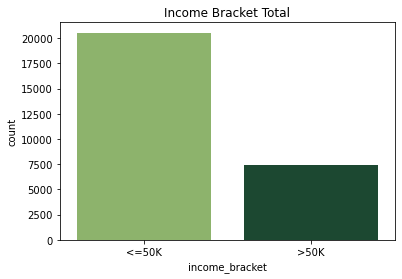

In [110]:
sns.countplot(x='income_bracket', data=df, palette=["#8cbf60", '#154f30'])
plt.title('Income Bracket Total')
plt.show()

In [111]:
df['income_bracket'].value_counts()

<=50K    20536
>50K      7436
Name: income_bracket, dtype: int64

There are give datas which need to be categorized later. A total of 20536 workers whose income group is less or equal than $50000. While the remaining 7436 income groups are more than $50000. It can be said that the data between 'income_bracket' less or equal $50000 (<= 50K) and more than $50000 (> 50K) are very imbalanced which is accurate because based on real case not many people consider as wealthy.

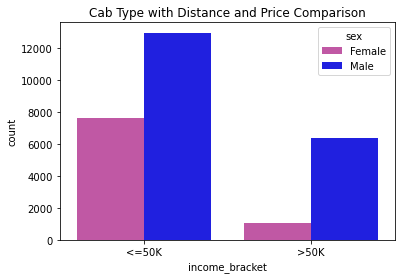

In [112]:
sns.countplot(x='income_bracket', data=df, hue='sex', palette=['#d147ac', 'blue'])
plt.title('Cab Type with Distance and Price Comparison')
plt.show()

In [113]:
df.groupby(['sex','income_bracket']).count().sort_values(by='income_bracket')['workclass']

sex     income_bracket
Female  <=50K              7595
Male    <=50K             12941
Female  >50K               1060
Male    >50K               6376
Name: workclass, dtype: int64

In both income groups, each group is dominated by male. It can be concluded that the data is mostly fulfilled by male. This could be because male usually have more responsibility to earn a living for their families rather than female. It is also supported from the marital status and relationship graph below that most of the adult category who has source income is Married-civ-spouse and a husband. This proportion not even included male in another category yet.

<AxesSubplot:xlabel='relationship', ylabel='count'>

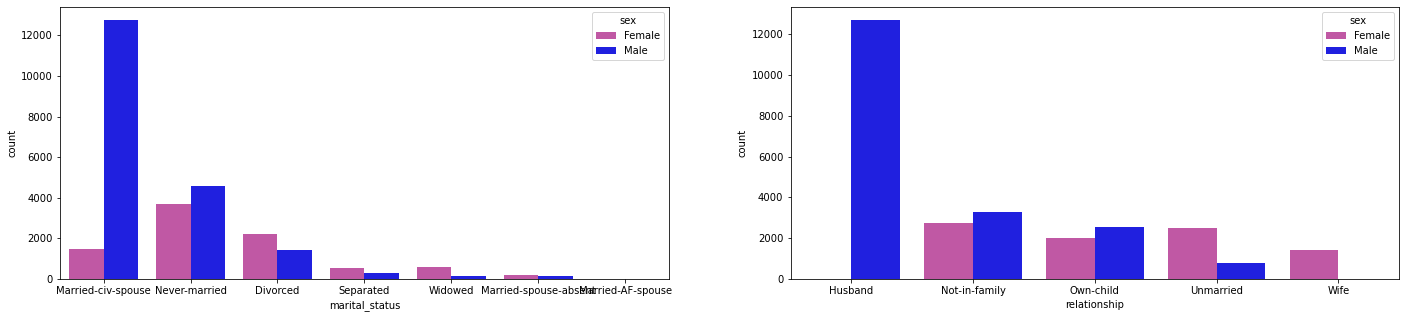

In [114]:
fig, ax =plt.subplots(1,2, figsize = (24,5))
sns.countplot(x='marital_status', data=df, order = df.marital_status.value_counts().index, hue='sex', palette=['#d147ac', 'blue'], ax=ax[0])
sns.countplot(x='relationship', data=df, order = df.relationship.value_counts().index, hue='sex', palette=['#d147ac', 'blue'], ax=ax[1])

What distinguishes between female and male later is the status in marriage (wife or husband). Because if not married then both are considered the same. For this reason, sex in general will not really affect the income bracket.

<AxesSubplot:xlabel='relationship', ylabel='count'>

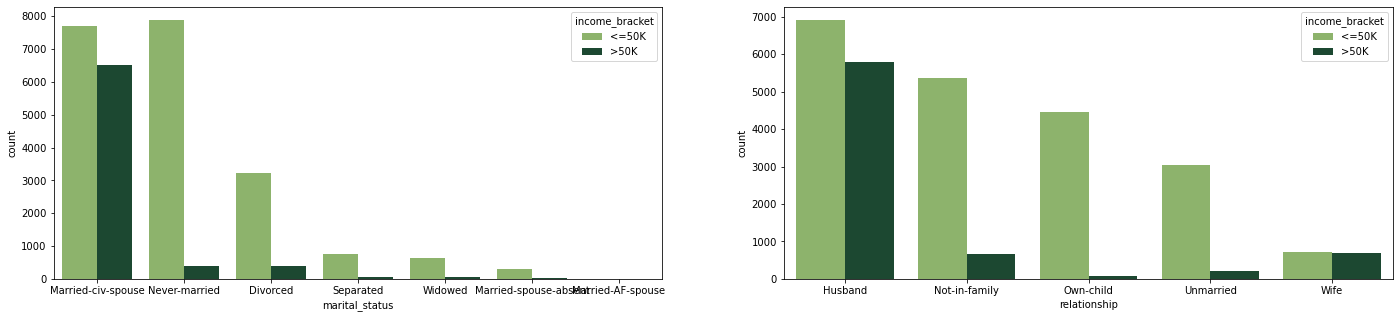

In [115]:
fig, ax =plt.subplots(1,2, figsize = (24,5))
sns.countplot(x='marital_status', data=df, order = df.marital_status.value_counts().index, hue='income_bracket', palette=["#8cbf60", '#154f30'], ax=ax[0])
sns.countplot(x='relationship', data=df, order = df.relationship.value_counts().index, hue='income_bracket', palette=["#8cbf60", '#154f30'], ax=ax[1])

Apart from comparison based on sex, marital status and relationship features can also be seen based on income bracket. The most income earners of more than 50K still fall on Married-civ-spouse and Husband. The others comparison of income bracket also seem significant except for wife in relationship category.

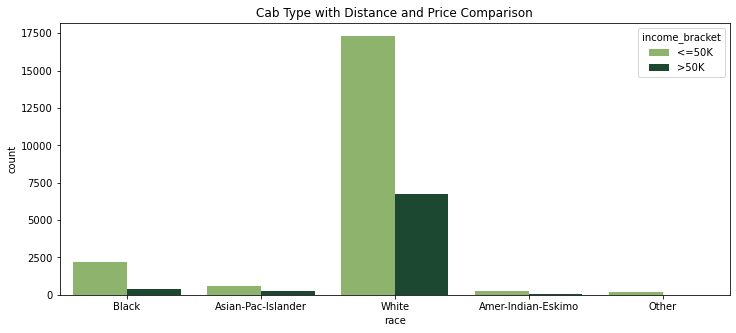

In [116]:
plt.figure(figsize = (12,5))
sns.countplot(x='race', data=df, hue='income_bracket', palette=["#8cbf60", '#154f30'])
plt.title('Cab Type with Distance and Price Comparison')
plt.show()

In [117]:
df.groupby(['race','income_bracket'])['income_bracket'].count()

race                income_bracket
Amer-Indian-Eskimo  <=50K               229
                    >50K                 33
Asian-Pac-Islander  <=50K               592
                    >50K                258
Black               <=50K              2205
                    >50K                366
Other               <=50K               188
                    >50K                 20
White               <=50K             17322
                    >50K               6759
Name: income_bracket, dtype: int64

We also can see all the races in the data and compare each of income. The most dominating race is Caucasian (White) in both income bracket group. But since white is the largest race from the dataset this is understandable because the race is the most numerous in the US. From the comparison itself, it can be said that it is significant between the two income brackets in each race. We can see the race composition for whole race from the pie chart below. 

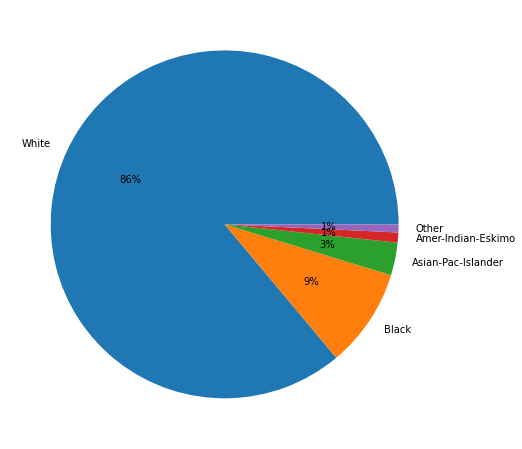

In [118]:
pie_chart_race_name = df['race'].value_counts().index.tolist()
pie_chart_race_total = df['race'].value_counts().tolist()

plt.figure(figsize = (15,8))
plt.pie(pie_chart_race_total, labels = pie_chart_race_name, autopct='%.0f%%')
plt.show()

In [119]:
df['race'].value_counts()

White                 24081
Black                  2571
Asian-Pac-Islander      850
Amer-Indian-Eskimo      262
Other                   208
Name: race, dtype: int64

Race is not a measure of income especially in this era. Usually this race is only a grouping identity based on individual description.

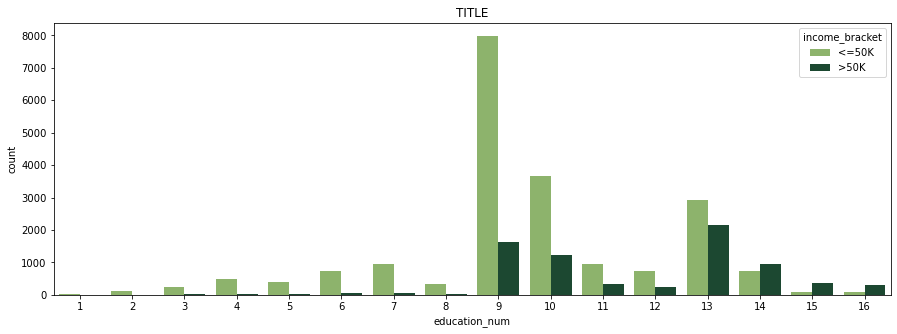

In [120]:
plt.figure(figsize = (15,5))
sns.countplot(x='education_num', data=df, hue='income_bracket', palette=["#8cbf60", '#154f30'])
plt.title('TITLE')
plt.show()

In [121]:
pd.DataFrame(df.groupby(['education_num','education','income_bracket'])['income_bracket'].count())

income_bracket
education_num education    income_bracket                
1             Preschool    <=50K                       42
2             1st-4th      <=50K                      134
                           >50K                         6
3             5th-6th      <=50K                      250
                           >50K                        13
4             7th-8th      <=50K                      505
                           >50K                        38
5             9th          <=50K                      408
                           >50K                        26
6             10th         <=50K                      736
                           >50K                        60
7             11th         <=50K                      946
                           >50K                        59
8             12th         <=50K                      343
                           >50K                        31
9             HS-grad      <=50K                     7982
                           >50K                      1620
10            Some-college <=50K                     3652
                           >50K                      1227
11            Assoc-voc    <=50K                      952
                           >50K                       345
12            Assoc-acdm   <=50K                      748
                           >50K                       257
13            Bachelors    <=50K                     2927
                           >50K                      2170
14            Masters      <=50K                      727
                           >50K                       938
15            Prof-school  <=50K                       82
                           >50K                       353
16            Doctorate    <=50K                      102
                           >50K                       293

The data also contains various educational background of each adult. Based on the table above, the most graduates background are from high school, followed by bachelors. While the least graduates are from preschool. It can be concluded that the adult in the dataset are considered well educated. But still the adult whos income more than $50000 still lesser in each education background.The portion of income bracket for each graduate is quite significant except preschool which does not have more than $50000 income bracket.

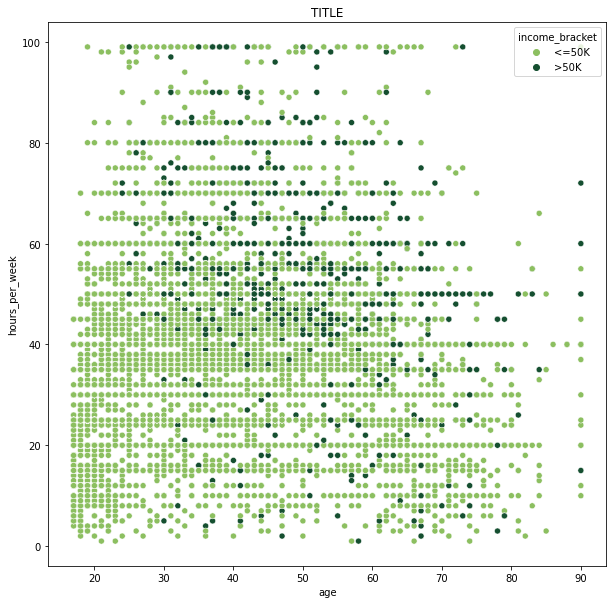

In [122]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='age', y='hours_per_week', data=df, hue='income_bracket', palette=["#8cbf60", '#154f30'])
plt.title('TITLE')
plt.show()

From the scatter plot, the age and number of hours worked per week are uncertain. Almost all age has various working hour per week. If we look closely, younger and elder has fewer working hour per week if being compared with adult in between 20's and 60's. It is most likely because of the retirement (late 60's) while the younger (17-19 years old) tend to work only as part-time job so the entire hours and age has growth and decline phase at certain age.
As for income bracket, the distribution are very random but the more than $50000 income group is dominant in between 30's until mid 60's.

<AxesSubplot:xlabel='workclass', ylabel='count'>

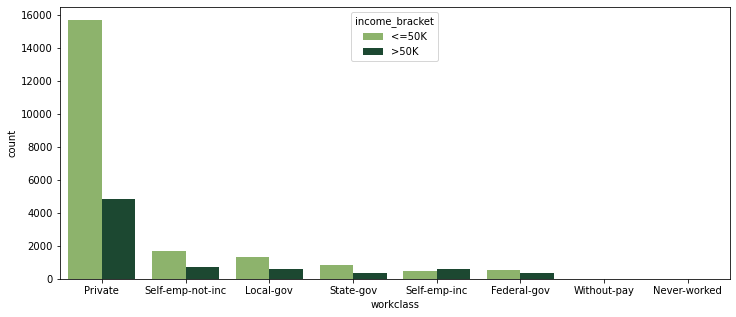

In [123]:
plt.figure(figsize = (12,5))
sns.countplot(x='workclass', data=df, order = df.workclass.value_counts().index, hue='income_bracket', palette=["#8cbf60", '#154f30'])

In [124]:
pd.DataFrame(df.groupby(['workclass','income_bracket'])['income_bracket'].count())

income_bracket
workclass        income_bracket                
Federal-gov      <=50K                      510
                 >50K                       357
Local-gov        <=50K                     1349
                 >50K                       601
Never-worked     <=50K                        7
Private          <=50K                    15686
                 >50K                      4829
Self-emp-inc     <=50K                      460
                 >50K                       606
Self-emp-not-inc <=50K                     1674
                 >50K                       696
State-gov        <=50K                      836
                 >50K                       347
Without-pay      <=50K                       14

If based on the workclass, most adults work for private companies. Each workclass mostly has an income bracket less than equal $50K except for Self-employees. More than half of Self-employee income bracket are more than $50000. At last there are without pay and Never worked. Both of those workclass are very few in number even none of them has income more than $50000. This class indicates that there are people who willing to working without pay, probably a volunteers or interns. Also it is very understandable why does both worklass do not have anyone who has income more than $50000.

<AxesSubplot:xlabel='occupation', ylabel='count'>

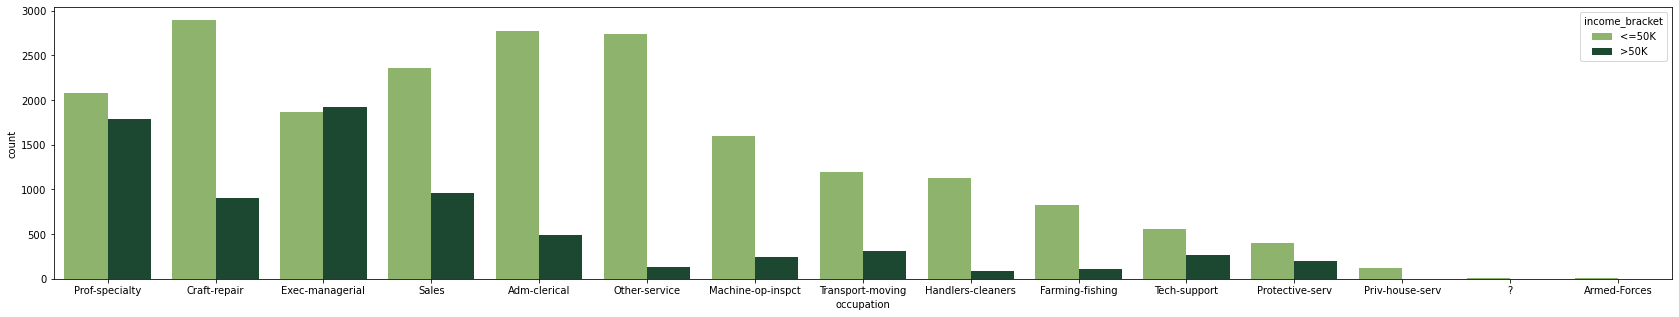

In [125]:
plt.figure(figsize = (29,5))
sns.countplot(x='occupation', data=df, order = df.occupation.value_counts().index, hue='income_bracket', palette=["#8cbf60", '#154f30'])

In [126]:
pd.DataFrame(df.groupby(['occupation','income_bracket'])['income_bracket'].count())

income_bracket
occupation        income_bracket                
?                 <=50K                        7
Adm-clerical      <=50K                     2771
                  >50K                       493
Armed-Forces      <=50K                        5
                  >50K                         1
Craft-repair      <=50K                     2896
                  >50K                       909
Exec-managerial   <=50K                     1863
                  >50K                      1921
Farming-fishing   <=50K                      821
                  >50K                       112
Handlers-cleaners <=50K                     1129
                  >50K                        84
Machine-op-inspct <=50K                     1598
                  >50K                       246
Other-service     <=50K                     2738
                  >50K                       130
Priv-house-serv   <=50K                      122
                  >50K                         1
Prof-specialty    <=50K                     2080
                  >50K                      1785
Protective-serv   <=50K                      398
                  >50K                       204
Sales             <=50K                     2360
                  >50K                       965
Tech-support      <=50K                      553
                  >50K                       271
Transport-moving  <=50K                     1195
                  >50K                       314

Most adults work in the Prof-Specialty field, but the income bracket of more than $50000 is mostly owned by adults who working as Executive Managerial. Even better more than half of executive income are more than $50000. Considering the workload and responsibility it is pretty justable. There are also (?) and armed forces occupation at the last order but only in the small amount so it looks almost invisible. It also explained why not many people interested in joining army or forces.

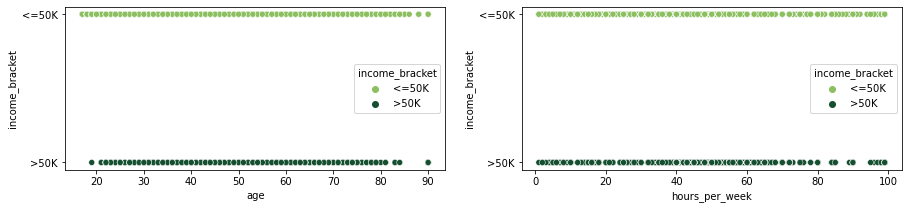

In [127]:
fig, ax =plt.subplots(1,2, figsize = (15,3))
sns.scatterplot(x='age', y='income_bracket', data=df ,hue='income_bracket', palette=["#8cbf60", '#154f30'], ax=ax[0])
sns.scatterplot(x='hours_per_week', y='income_bracket', data=df, hue='income_bracket', palette=["#8cbf60", '#154f30'], ax=ax[1])
plt.show()

Next, analyzing the data distribution based on income bracket. It has been explained in the previous scatter plot that all ages and working hours have different income groups. This current scatter plot give validation that doen't matter how much hour people working and how old they are the income are uncertain. In logistic regression it is harder to classifying the class with current situation.

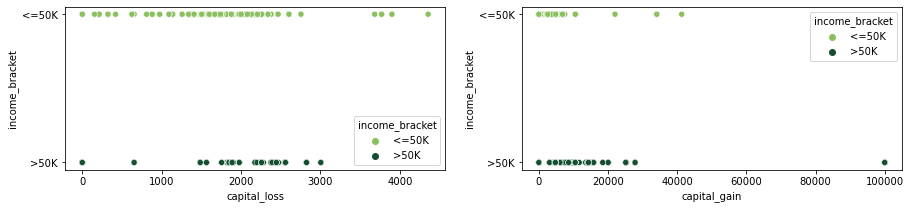

In [128]:
fig, ax =plt.subplots(1,2, figsize = (15,3))
sns.scatterplot(x='capital_loss', y='income_bracket', data=df ,hue='income_bracket', palette=["#8cbf60", '#154f30'], ax=ax[0])
sns.scatterplot(x='capital_gain', y='income_bracket', data=df, hue='income_bracket', palette=["#8cbf60", '#154f30'], ax=ax[1])
plt.show()

This also happen with capital gain and loss. Supposed a person who obtained more capitall gain has more income and people who loss more capital has less income but it is not happen in the current dataset. There could be people who already has large income who loss their capital still can have large income because this person already have planning. Meanwhile in capital gain, several of people gained a large capital but the income is still less than $50000, there are several other factors that may influence current situation.

Some of the explanations above, there is no significant grouping that defines that the individual has an income bracket of more or less than $50000. However, because this grouping only defines that a person is classified as wealthy or not, if there is an error, it will not have too much negative impact on the individual who is misclassified. Except for several things such as tax payment. People who have income are more likely to pay a higher percentage of tax but if there is someone who is not classified as wealthy but has to pay more tax then it can be detrimental to that person.

# 5 - Data Prepocessing

## Get Inference

In [129]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state = 50) #change random state
df_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
10727,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
19270,63,Private,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Male,0,0,45,United-States,>50K
12905,23,Private,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
22911,23,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,<=50K
6843,58,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,24,United-States,<=50K
14148,20,Private,9th,5,Never-married,Sales,Own-child,White,Female,0,0,32,United-States,<=50K
14361,41,Private,10th,6,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
970,33,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
3121,32,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
26012,28,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,43,Mexico,<=50K


In [130]:
# Remove Inference-Set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27967,22,State-gov,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
27968,26,Private,Assoc-acdm,12,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
27969,47,Private,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
27970,59,Self-emp-not-inc,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [131]:
# Reset Index (Minimalizing error)

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
1,63,Private,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Male,0,0,45,United-States,>50K
2,23,Private,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
3,23,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,<=50K
4,58,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,24,United-States,<=50K
5,20,Private,9th,5,Never-married,Sales,Own-child,White,Female,0,0,32,United-States,<=50K
6,41,Private,10th,6,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
7,33,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
8,32,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
9,28,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,43,Mexico,<=50K


## Feature Selection

In [132]:
# Display all columns

df_train_test.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

The target is to predict Income bracket so here ara several feature considered to included in training and testing.
- Age. Usually the older people, the more experience they gaines so the income can become larger.
- Workclass. Define what kind of company of that person work for. Sometimes the private company for certain position 
- Education. In some cases, the higher education of that person, the more income they get.
- Marital-status. In some cases, if you are married, single, or divorced, your salary is affected.
- Occupation. The ocupation of someone always impact their income.
- Relationship. In some cases, if you are married or have children, your salary is usually increased.
- Capital-gain. It has been explained before that the more capital people gained their income can be increased. 
- Capital-loss. Reverse of capital loss.
- Hours-per-week. For certain cases, the more people work, the larger income they get.
- Native-country. Describe individual their native country. Usually if that person is local or outsider the salary can also being affected.


Based on the existing features, some columns that are deemed unnecessary will be removed. First is education. Education has been represented from another feature, namely 'education_num' because 'education_num' is also sequential based on its level, so education will be deleted. Second is race. It's not on the era where several race still discriminated. Right nor race only become a physical identity for individual so that they can be easily identified, therefore the race will be deleted. Third is Sex. Previously it has been explained that What distinguishes between female and male later is the status in marriage (wife or husband). Because if not married then both are considered the same. Therefore sex does not affect income. 

In [133]:
# Drop the unecessary columns

dropped_col_df = df_train_test.drop(['education','race','sex'],axis=1)

dropped_col_df


,age,workclass,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,5,Married-civ-spouse,Other-service,Wife,3411,0,34,United-States,<=50K
1,72,Private,5,Married-civ-spouse,Exec-managerial,Wife,0,0,48,United-States,>50K
2,45,Private,5,Married-civ-spouse,Machine-op-inspct,Wife,0,0,40,United-States,>50K
3,31,Private,5,Married-civ-spouse,Exec-managerial,Wife,0,0,40,United-States,<=50K
4,55,Private,5,Married-civ-spouse,Tech-support,Wife,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
27957,22,State-gov,12,Never-married,Adm-clerical,Not-in-family,0,0,40,United-States,<=50K
27958,26,Private,12,Never-married,Other-service,Not-in-family,0,0,40,United-States,<=50K
27959,47,Private,12,Never-married,Adm-clerical,Not-in-family,0,0,40,United-States,<=50K
27960,59,Self-emp-not-inc,12,Divorced,Tech-support,Not-in-family,0,0,40,United-States,<=50K


Next doing simple cardiality. There are a lot of origin country in 'native_country'. This Native Country will later be divided between US and Non US. Missing Value is usually handled in the Handling Missing Value section, but because there is data in 'native_country' which has a value of '?' and the identity of them is unknown, it will be handled prior to the change in value in the 'Native_Country'/ Note: Also we can change (?) values to null in data loading.

In [134]:
# Drop row with (?) value

dropped_col_df.drop(dropped_col_df[dropped_col_df['native_country'] == '?'].index, inplace = True)

In [135]:
# Change native Country

dropped_col_df.loc[dropped_col_df["native_country"] != "United-States", "native_country"] = "Non-United-States"

dropped_col_df

,age,workclass,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,5,Married-civ-spouse,Other-service,Wife,3411,0,34,United-States,<=50K
1,72,Private,5,Married-civ-spouse,Exec-managerial,Wife,0,0,48,United-States,>50K
2,45,Private,5,Married-civ-spouse,Machine-op-inspct,Wife,0,0,40,United-States,>50K
3,31,Private,5,Married-civ-spouse,Exec-managerial,Wife,0,0,40,United-States,<=50K
4,55,Private,5,Married-civ-spouse,Tech-support,Wife,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
27957,22,State-gov,12,Never-married,Adm-clerical,Not-in-family,0,0,40,United-States,<=50K
27958,26,Private,12,Never-married,Other-service,Not-in-family,0,0,40,United-States,<=50K
27959,47,Private,12,Never-married,Adm-clerical,Not-in-family,0,0,40,United-States,<=50K
27960,59,Self-emp-not-inc,12,Divorced,Tech-support,Not-in-family,0,0,40,United-States,<=50K


## Splitting between 'X' (Features) and 'y' (Target)

In [136]:
# Splitting Features and Target

X = dropped_col_df.drop('income_bracket', axis = 1)
y = dropped_col_df['income_bracket']

X

,age,workclass,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country
0,39,Private,5,Married-civ-spouse,Other-service,Wife,3411,0,34,United-States
1,72,Private,5,Married-civ-spouse,Exec-managerial,Wife,0,0,48,United-States
2,45,Private,5,Married-civ-spouse,Machine-op-inspct,Wife,0,0,40,United-States
3,31,Private,5,Married-civ-spouse,Exec-managerial,Wife,0,0,40,United-States
4,55,Private,5,Married-civ-spouse,Tech-support,Wife,0,0,23,United-States
...,...,...,...,...,...,...,...,...,...,...
27957,22,State-gov,12,Never-married,Adm-clerical,Not-in-family,0,0,40,United-States
27958,26,Private,12,Never-married,Other-service,Not-in-family,0,0,40,United-States
27959,47,Private,12,Never-married,Adm-clerical,Not-in-family,0,0,40,United-States
27960,59,Self-emp-not-inc,12,Divorced,Tech-support,Not-in-family,0,0,40,United-States


In [137]:
# Splitting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13) 

# Checking train and test size

print('Features Train Size : ', X_train.shape,', Target Train Size : ', y_train.shape)
print('Features Test Size : ', X_test.shape,', Target Test Size : ', y_test.shape)

Features Train Size :  (21967, 10) , Target Train Size :  (21967,)
Features Test Size :  (5492, 10) , Target Test Size :  (5492,)


## Handling Missing Values

### Features Train

In [138]:
# Checking missing value in features train

X_train.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

The Missing value in 'native_country' has been handled but in occupation there are also missing value with '?' (I checked again one by one). So later teh row with those null value will be dropped.

In [139]:
# Drop row with (?) value
X_train.drop(X_train[X_train['occupation'] == '?'].index, inplace = True)


### Features Test

In [140]:
# Checking missing value in features test

X_test.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Dropping '?' value in 'occupation' feature same as Features train. 

In [141]:
# Drop row with (?) value
X_test.drop(X_test[X_test['occupation'] == '?'].index, inplace = True)


### Target Train

In [142]:
# Checking missing value in target train

y_train.isnull().sum()

0

There are no missing values in Target Train. Since there are row dropped in Features Train, I'm erasing row in Target Train with similiar index in Feature Train.

In [143]:
# Drop Row to match Features train

y_train = y_train[y_train.index.isin(X_train.index)]

### Target Test

In [144]:
# Checking missing value in target test

y_test.isnull().sum()

0

There are no missing values in Target Train. Also doing similiar step in Target Test.

In [145]:
# Drop Row to match Features test

y_test = y_test[y_test.index.isin(X_test.index)]

## Handling Outlier

Handling Outlier only done in Features Train Only. Since later we will predict the 'Income bracket' using Logistic Regression and SVC, the outlier will be handled by winsorizing. The reason is because winsorizing will replace the upper and lower value with IQR maximun and minmun value. SVC is a model which very sensitive towards outlier, so without change the mean and the quartile, the outlier will still be handled.

#### Age

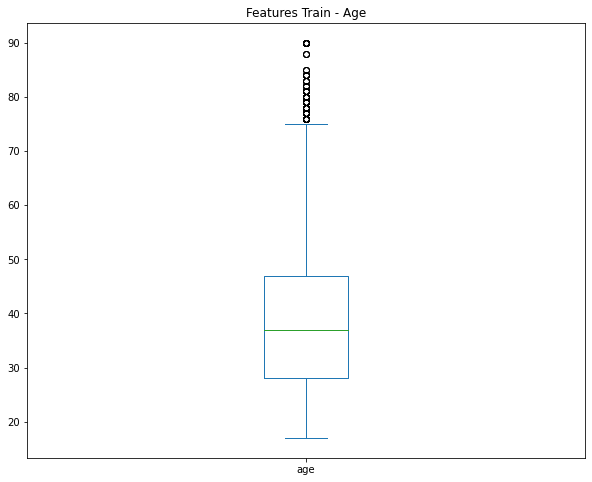

In [146]:
# showing boxplot

X_train['age'].plot(kind='box', title='Features Train - Age', figsize=(10,8))
plt.show()

In [147]:
# Skewness Calculation
X_train_age_skew = X_train['age'].skew()
X_train_age_skew

0.5080857855312014

Based on the boxplot graph and skewness, the age data consider as right skew because the skewness obtained is 0.508 with several outlier at the upper side. Therefore, the Max IQR will be calculated based on skew formula.

In [148]:
# Upper and Lower Boundaries Calculation

X_train_age_q3, X_train_age_q1 = np.percentile(X_train['age'], [75 ,25])
X_train_age_iqr = X_train_age_q3 - X_train_age_q1
# max_X_train_age_iqr = X_train['age'].mean() + 3 * X_train['age'].std()
max_X_train_age_iqr = X_train_age_q3 + 1.5 * X_train_age_iqr 
print('Upper Boundaries Age = ', max_X_train_age_iqr)

Upper Boundaries Age =  75.5


In [149]:
# Winsorizing

X_train_age = X_train['age']
X_train_age.loc[X_train_age > max_X_train_age_iqr] = max_X_train_age_iqr

/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_10418/979028414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_age.loc[X_train_age > max_X_train_age_iqr] = max_X_train_age_iqr


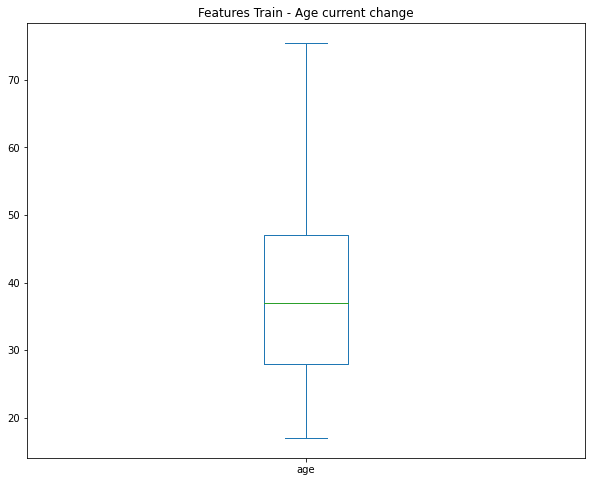

In [150]:
# showing changed boxplot

X_train_age.plot(kind='box', title='Features Train - Age current change', figsize=(10,8))
plt.show()

#### hours_per_week

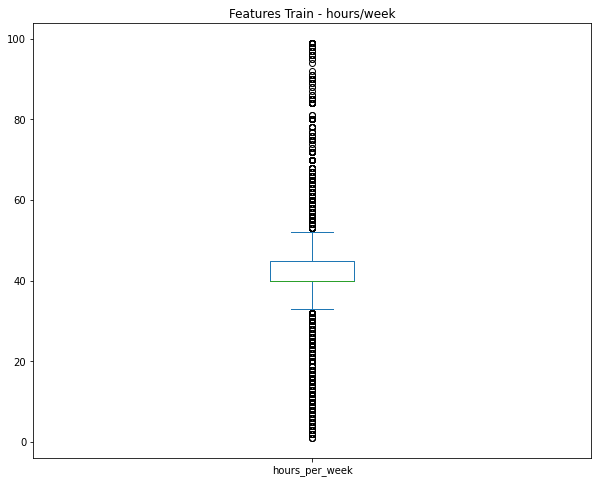

In [151]:
# Upper and Lower Boundaries Calculation

X_train['hours_per_week'].plot(kind='box', title='Features Train - hours/week', figsize=(10,8))
plt.show()

In [152]:
# Skewness Calculation

X_train_hours_per_week_skew = X_train['hours_per_week'].skew()
X_train_hours_per_week_skew

0.35662841283313007

Based on the boxplot graph and skewness, the hours data consider as normal because the skewness obtained is 0.3566 but there are a lot of outlier in upper and lower side. Therefore, the Max IQR will be calculated based on extreme normal distribution.

In [153]:
# Upper and Lower Boundaries Calculation

X_train_hours_per_week_q3, X_train_hours_per_week_q1 = np.percentile(X_train['hours_per_week'], [75 ,25])
X_train_hours_per_week_iqr = X_train_hours_per_week_q3 - X_train_hours_per_week_q1

max_X_train_hours_per_week_iqr = X_train['hours_per_week'].mean() + 3 * X_train['hours_per_week'].std() 
min_X_train_hours_per_week_iqr = X_train['hours_per_week'].mean() - 3 * X_train['hours_per_week'].std() 
print('Upper Boundaries Hours = ', max_X_train_hours_per_week_iqr)
print('Lower Boundaries Hours = ', min_X_train_hours_per_week_iqr)

Upper Boundaries Hours =  77.29198960197195
Lower Boundaries Hours =  4.896526403674436


In [154]:
# Winsorizing
X_train_hours_per_week = X_train['hours_per_week']
X_train_hours_per_week.loc[X_train_hours_per_week > max_X_train_hours_per_week_iqr] = max_X_train_hours_per_week_iqr
X_train_hours_per_week.loc[X_train_hours_per_week < min_X_train_hours_per_week_iqr] = min_X_train_hours_per_week_iqr

/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_10418/782078391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_hours_per_week.loc[X_train_hours_per_week > max_X_train_hours_per_week_iqr] = max_X_train_hours_per_week_iqr


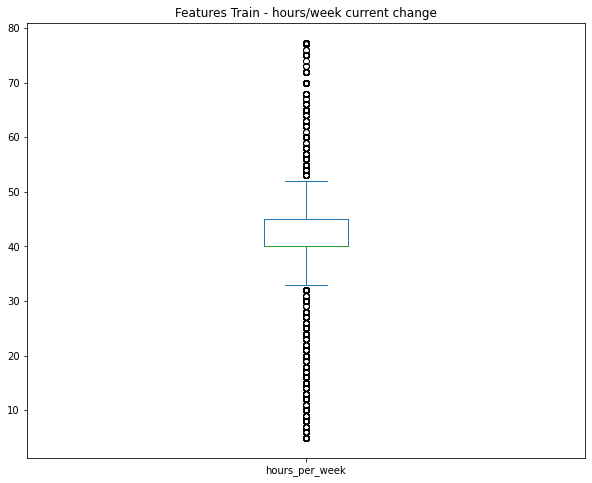

In [155]:
# showing changed boxplot

X_train_hours_per_week.plot(kind='box', title='Features Train - hours/week current change', figsize=(10,8))
plt.show()

#### Capital Gain

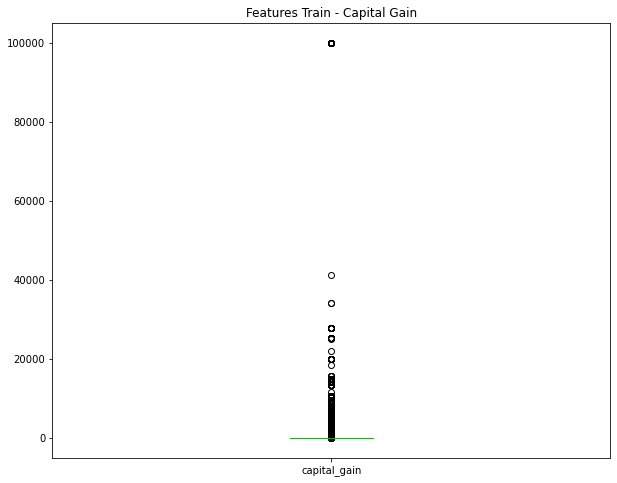

In [156]:
# showing boxplot

X_train['capital_gain'].plot(kind='box', title='Features Train - Capital Gain', figsize=(10,8))
plt.show()

In [157]:
# Skewness Calculation

X_train_capital_gain_skew = X_train['capital_gain'].skew()
X_train_capital_gain_skew

11.587624769871073

In [158]:
# Upper and Lower Boundaries Calculation

X_train_capital_gain_q3, X_train_capital_gain_q1 = np.percentile(X_train['capital_gain'], [75 ,25])
X_train_capital_gain_iqr = X_train_capital_gain_q3 - X_train_capital_gain_q1
# max_X_train_capital_gain_iqr = X_train['capital_gain'].mean() + 3 * X_train['capital_gain'].std()
max_X_train_capital_gain_iqr = X_train_capital_gain_q3 + 3 * X_train_capital_gain_iqr 
print('Upper Boundaries Capital_gain = ', max_X_train_capital_gain_iqr)



Upper Boundaries Capital_gain =  0.0


Capital Gain included extreme right skew. In Capital Gain there are also many outliers. It seems all the capital gain which is not 0 consider as outliers. So based on trial and error if we change the outliers, the model evaluation diference between train and test result are very significant. Since SVM is very sensitive to outlier so the outlier still need to be handled.

In [159]:
# Winsorizing

X_train_capital_gain = X_train['capital_gain']
X_train_capital_gain.loc[X_train_capital_gain > max_X_train_capital_gain_iqr] = max_X_train_capital_gain_iqr

/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_10418/3483411246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_capital_gain.loc[X_train_capital_gain > max_X_train_capital_gain_iqr] = max_X_train_capital_gain_iqr


#### Capital Loss

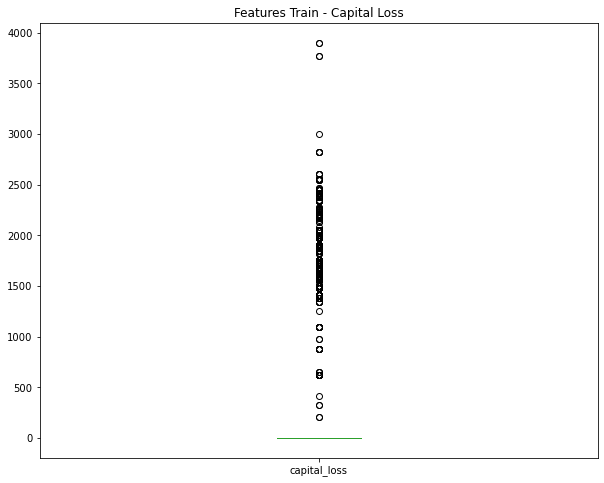

In [160]:
# showing boxplot

X_train['capital_loss'].plot(kind='box', title='Features Train - Capital Loss', figsize=(10,8))
plt.show()

In [161]:
# Skewness Calculation

X_train_capital_loss_skew = X_train['capital_loss'].skew()
X_train_capital_loss_skew

4.43097682928695

In [162]:
# Upper and Lower Boundaries Calculation

X_train_capital_loss_q3, X_train_capital_loss_q1 = np.percentile(X_train['capital_loss'], [75 ,25])
X_train_capital_loss_iqr = X_train_capital_loss_q3 - X_train_capital_loss_q1
# max_X_train_capital_loss_iqr = X_train['capital_loss'].mean() + 3 * X_train['capital_loss'].std()
max_X_train_capital_loss_iqr = X_train_capital_loss_q3 + 3 * X_train_capital_loss_iqr 
print('Upper Boundaries Capital_loss = ', max_X_train_capital_loss_iqr)


Upper Boundaries Capital_loss =  0.0


Treat Capital loss similiar with capital gain.

In [163]:
# Winsorizing

X_train_capital_loss = X_train['capital_loss']
X_train_capital_loss.loc[X_train_capital_loss > max_X_train_capital_loss_iqr] = max_X_train_capital_loss_iqr


/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_10418/1914182025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_capital_loss.loc[X_train_capital_loss > max_X_train_capital_loss_iqr] = max_X_train_capital_loss_iqr


#### Final Replacement without outlier

In [164]:
# Choosen features train for later calculation

X_train['age'] = X_train_age
X_train['hours_per_week'] = X_train_hours_per_week
X_train['capital_gain'] = X_train_capital_gain
X_train['capital_loss'] = X_train_capital_loss

## Split between Numerical Columns and Categorical Columns

In [165]:
# Split numerical and categorical based on dt types

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Columns :  ['workclass', 'marital_status', 'occupation', 'relationship', 'native_country']


In [166]:
# Split Train-Set and Train-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [167]:
# Checking features and target length

print('Features Train numeric length = ', len(X_train_num))
print('Features Train categorical length = ', len(X_train_cat))
print('Features Test numeric length = ', len(X_test_num))
print('Features Test caategorical length = ', len(X_test_cat))

Features Train numeric length =  21961
Features Train categorical length =  21961
Features Test numeric length =  5491
Features Test caategorical length =  5491


## Feature Scaling

Text(0.5, 1.0, 'Distance Distribution')

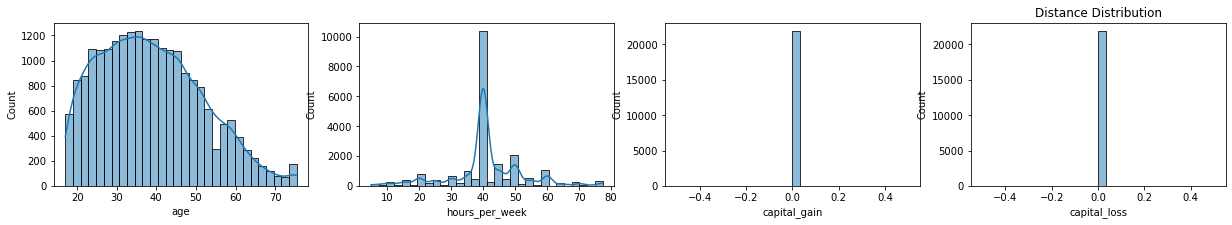

In [168]:
fig, ax =plt.subplots(1,4, figsize = (21,3))
sns.histplot(X_train['age'], bins=30, kde=True, ax=ax[0])
sns.histplot(X_train['hours_per_week'], bins=30, kde=True, ax=ax[1])
sns.histplot(X_train['capital_gain'], bins=30, kde=True, ax=ax[2])
sns.histplot(X_train['capital_loss'], bins=30, kde=True, ax=ax[3])
# sns.displot(X_train_num['distance'], kde=True, label='Standard deviation on the Data')
plt.title('Distance Distribution')

In [169]:
print('Current Age Skew = ',X_train['age'].skew())
print('Current Hours per Week Skew = ', X_train['hours_per_week'].skew())
print('Current Capital Gain Skew = ', X_train['capital_gain'].skew())
print('Current Capital Loss Skew = ', X_train['capital_loss'].skew())

Current Age Skew =  0.4388975879513834
Current Hours per Week Skew =  -0.02015735567117916
Current Capital Gain Skew =  0
Current Capital Loss Skew =  0


Based on the skewess in each numerical features above, all of the data type consider as normal distribution. The scalar that will be used in the scaling is a standard scalar 

In [170]:
# Feature Scaling using Standard Scaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train_num)
X_train_num = standard_scaler.transform(X_train_num)
X_test_num = standard_scaler.transform(X_test_num)


## Feature Encoding

In [171]:
X_train_cat.head()

,workclass,marital_status,occupation,relationship,native_country
18042,Private,Never-married,Adm-clerical,Own-child,United-States
351,Federal-gov,Married-civ-spouse,Adm-clerical,Wife,United-States
18264,Private,Never-married,Other-service,Own-child,United-States
18983,Private,Never-married,Transport-moving,Unmarried,United-States
15643,Private,Never-married,Sales,Own-child,United-States


In [172]:
columns_for_OHE = X_train_cat.columns.tolist()

In [173]:
print('Columns to OHE Encoder = ', columns_for_OHE)

Columns to OHE Encoder =  ['workclass', 'marital_status', 'occupation', 'relationship', 'native_country']


In [174]:
X_train_OHE_cat = X_train_cat[columns_for_OHE]

X_test_OHE_cat = X_test_cat[columns_for_OHE]

### OHE

In [175]:
# Feature encoding with OHE encoder

OHE_encoder = OneHotEncoder()
OHE_encoder.fit(X_train_OHE_cat)
X_train_OHE_encoded = OHE_encoder.transform(X_train_OHE_cat).toarray()
X_test_OHE_encoded = OHE_encoder.transform(X_test_OHE_cat).toarray()

In [176]:
# concate as final Features Category

X_train_cat

,workclass,marital_status,occupation,relationship,native_country
18042,Private,Never-married,Adm-clerical,Own-child,United-States
351,Federal-gov,Married-civ-spouse,Adm-clerical,Wife,United-States
18264,Private,Never-married,Other-service,Own-child,United-States
18983,Private,Never-married,Transport-moving,Unmarried,United-States
15643,Private,Never-married,Sales,Own-child,United-States
...,...,...,...,...,...
27867,Private,Never-married,Adm-clerical,Not-in-family,United-States
24505,Private,Divorced,Craft-repair,Not-in-family,United-States
76,Private,Married-civ-spouse,Other-service,Wife,United-States
14787,Private,Never-married,Other-service,Own-child,United-States


In [177]:
# Get categorical name for OHE column

workclass_values = X_train['workclass'].value_counts().index.tolist()
marital_status_values = X_train['marital_status'].value_counts().index.tolist()
occupation_values = X_train['occupation'].value_counts().index.tolist()
relationship_values = X_train['relationship'].value_counts().index.tolist()
# race_values = X_train['race'].value_counts().index.tolist()
# sex_values = X_train['sex'].value_counts().index.tolist()
native_country_values = X_train['native_country'].value_counts().index.tolist()

# Sorting name for column

workclass_values.sort()
marital_status_values.sort()
occupation_values.sort()
relationship_values.sort()
# race_values.sort()
# sex_values.sort()
native_country_values.sort()

OHE_col = workclass_values + marital_status_values + occupation_values + relationship_values + native_country_values
OHE_col


['Federal-gov',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 'Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Husband',
 'Not-in-family',
 'Own-child',
 'Unmarried',
 'Wife',
 'Non-United-States',
 'United-States']

### Final Scale

In [178]:
X_train_cat = np.concatenate([X_train_OHE_encoded], axis = 1)
X_test_cat = np.concatenate([X_test_OHE_encoded], axis = 1)

X_train_cat.shape

(21961, 35)

In [179]:
cat_columns = OHE_col
cat_columns

['Federal-gov',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 'Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Husband',
 'Not-in-family',
 'Own-child',
 'Unmarried',
 'Wife',
 'Non-United-States',
 'United-States']

## Concat between Numerical Columns and Categorical Columns

In [180]:
# Concate into features train and test

X_train_final = np.concatenate([X_train_num, X_train_cat], axis = 1)
X_test_final = np.concatenate([X_test_num, X_test_cat], axis = 1)

X_train_final

array([[-1.43943409, -0.05940742,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20517228, -0.44482731,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.51657545, -0.05940742,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.72336179, -0.8302472 ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.59371681, -0.8302472 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.74516182, -0.44482731,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [181]:
X_train

,age,workclass,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country
18042,20.0,Private,10,Never-married,Adm-clerical,Own-child,0,0,20.0,United-States
351,36.0,Federal-gov,9,Married-civ-spouse,Adm-clerical,Wife,0,0,40.0,United-States
18264,19.0,Private,10,Never-married,Other-service,Own-child,0,0,23.0,United-States
18983,22.0,Private,8,Never-married,Transport-moving,Unmarried,0,0,30.0,United-States
15643,22.0,Private,9,Never-married,Sales,Own-child,0,0,35.0,United-States
...,...,...,...,...,...,...,...,...,...,...
27867,21.0,Private,12,Never-married,Adm-clerical,Not-in-family,0,0,10.0,United-States
24505,47.0,Private,9,Divorced,Craft-repair,Not-in-family,0,0,44.0,United-States
76,61.0,Private,8,Married-civ-spouse,Other-service,Wife,0,0,40.0,United-States
14787,18.0,Private,8,Never-married,Other-service,Own-child,0,0,25.0,United-States


In [182]:
num_columns

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [183]:
cat_columns

['Federal-gov',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 'Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Adm-clerical',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Husband',
 'Not-in-family',
 'Own-child',
 'Unmarried',
 'Wife',
 'Non-United-States',
 'United-States']

In [184]:

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cat_columns])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns+cat_columns])

X_train_final_df

,age,education_num,capital_gain,capital_loss,hours_per_week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Own-child,Unmarried,Wife,Non-United-States,United-States
0,-1.439434,-0.059407,0.0,0.0,-1.807664,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.205172,-0.444827,0.0,0.0,-0.084364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.516575,-0.059407,0.0,0.0,-1.549169,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.285151,-0.830247,0.0,0.0,-0.946014,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.285151,-0.444827,0.0,0.0,-0.515189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21956,-1.362293,0.711432,0.0,0.0,-2.669315,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21957,0.643383,-0.444827,0.0,0.0,0.260297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21958,1.723362,-0.830247,0.0,0.0,-0.084364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
21959,-1.593717,-0.830247,0.0,0.0,-1.376839,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 6 - Model Definition

The models used are Logistic Regression and Support Vectore Machine according to the case study. Several hyperparameters in the following model were also tried by trial and error to find the most optimal model.

In [185]:
# Modeling using Linear Regression

log_reg_model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='multinomial', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [186]:
# Modeling using Linear Regression SVM

SVM_model = SVC(C=10 , gamma=0.1)

# 7 - Model Training

In [187]:
# Training using Linear Regression

log_reg_model.fit(X_train_final_df,y_train)

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [188]:
# Training using SVM

SVM_model.fit(X_train_final_df,y_train)

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


SVC(C=10, gamma=0.1)

# 8 - Model Evaluation

Model Evaluation result of Logistic Regression and SVM

## Logistic Regression

In [189]:
# Predict Logistic regression model

y_pred_train = log_reg_model.predict(X_train_final)
y_pred_test = log_reg_model.predict(X_test_final)

In [190]:
# Display Logistic Regression Accuracy

print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test),'\n')

accuracy score train :  0.81990801876053
accuracy score test :  0.8273538517574213 



In [191]:
# Display Logistic Regression Classification Report

print('classification report train : \n',classification_report(y_train,y_pred_train),'\n')
print('classification report test : \n',classification_report(y_test,y_pred_test))

classification report train : 
               precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88     16086
        >50K       0.70      0.58      0.63      5875

    accuracy                           0.82     21961
   macro avg       0.78      0.74      0.76     21961
weighted avg       0.81      0.82      0.81     21961
 

classification report test : 
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4073
        >50K       0.69      0.60      0.64      1418

    accuracy                           0.83      5491
   macro avg       0.78      0.75      0.76      5491
weighted avg       0.82      0.83      0.82      5491



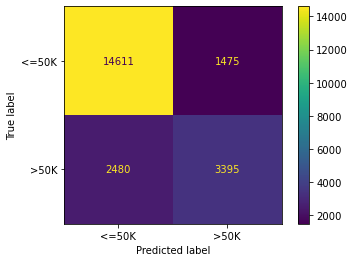

In [192]:
# Display Logistic Regression Confusion matrix - Train

cm_log_reg_train = confusion_matrix(y_train, y_pred_train, labels=log_reg_model.classes_)
displog_reg_train = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train,display_labels=log_reg_model.classes_)

displog_reg_train.plot()
plt.show()

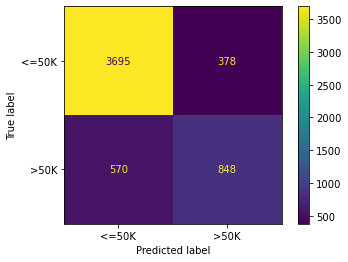

In [193]:
# Display Logistic Regression Confusion matrix - Test

cm_log_reg_test = confusion_matrix(y_test, y_pred_test, labels=log_reg_model.classes_)
disp_log_reg_test = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_test,display_labels=log_reg_model.classes_)

disp_log_reg_test.plot()
plt.show()

Based on the evaluation of the logistic Regression model above, when viewed from its accuracy, it can be concluded that the model is included in the overfit from the point of view of test. The train accuracy score is 0.81990801876053 while the test score is 0.8273538517574213 which means the test score superior than train score. Meanwhile, when viewed from the Classification report for the train and test the precision, recall, and f1 score of test also superior rather than train except precision in >50K. It is due to False Positive of >50K(Predicted label = >50K, True = <=50K) on test occured more than in train sets. The number of classification mistakes in >50K is more than half of true positive makes this logistic regression model considered not good enough.

## SVM

In [194]:
# Predict SVM model

y_pred_train_svm = SVM_model.predict(X_train_final)
y_pred_test_svm = SVM_model.predict(X_test_final)

In [195]:
# Display SVM accuracy

print('accuracy score train : ',accuracy_score(y_train, y_pred_train_svm))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_svm),'\n')

accuracy score train :  0.8390783661946177
accuracy score test :  0.7801857585139319 



In [196]:
# Display SVM Classification Report

print('classification report train : \n', classification_report(y_train, y_pred_train_svm),'\n')
print('classification report test : \n', classification_report(y_test, y_pred_test_svm))

classification report train : 
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89     16086
        >50K       0.73      0.64      0.68      5875

    accuracy                           0.84     21961
   macro avg       0.80      0.77      0.79     21961
weighted avg       0.83      0.84      0.84     21961
 

classification report test : 
               precision    recall  f1-score   support

       <=50K       0.82      0.91      0.86      4073
        >50K       0.61      0.41      0.49      1418

    accuracy                           0.78      5491
   macro avg       0.71      0.66      0.67      5491
weighted avg       0.76      0.78      0.76      5491



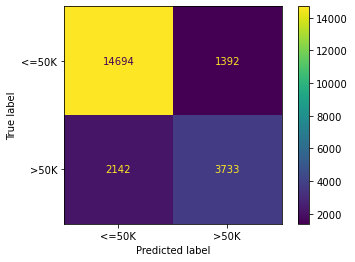

In [197]:
# Display SVM Confusion matrix - Train

cm_svm_train = confusion_matrix(y_train, y_pred_train_svm, labels=SVM_model.classes_)
disp_svm_train = ConfusionMatrixDisplay(confusion_matrix=cm_svm_train,display_labels=SVM_model.classes_)

disp_svm_train.plot()
plt.show()

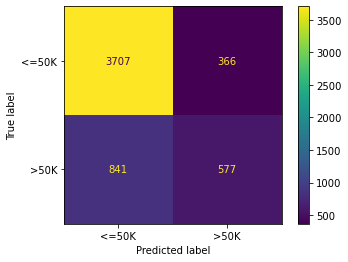

In [198]:
# Display SVM Confusion matrix - Test

cm_svm_test = confusion_matrix(y_test, y_pred_test_svm, labels=SVM_model.classes_)
disp_svm_test = ConfusionMatrixDisplay(confusion_matrix=cm_svm_test,display_labels=SVM_model.classes_)

disp_svm_test.plot()
plt.show()

With the same evaluation observations as Logistic Regression, based on its accuracy, the model is said to be overfit from the perspective train. The score obtained with the SVC(C=10, gamma=0.1) model from the train accuracy is 0.8390783661946177 while the test accuracy is 0.7801857585139319. The difference is what makes this SVC model overfit. Meanwhile, from the Classification Report, the difference in precision, recall, and f1-score is very far between the train and the test. The score train in this model is superior in all aspects while the score test is still far from achieving the same score as the train. The big difference is probably caused by capital loss and capital train. In the capital gains and losses in the train the outliers are removed by min and max iqr where previously the max value was changed to 0 so that after the scale the values were all 0. This causes the inability of the train to study the capital gains and losses. So when there are capital gains and losses calculated on the test, the results will not be as precise as those in the train.



# 9 - Model Inference

In [199]:
df_inf.loc[df_inf["native_country"] != "United-States", "native_country"] = "Non-United-States"


In [200]:
# Split between numerical columns and categorical columns

data_inf_num = df_inf[num_columns]
data_inf_cat = df_inf[columns_for_OHE]

In [201]:

# Feature Scaling and Feature Encoding

data_inf_num_scaled = standard_scaler.transform(data_inf_num)
data_inf_cat_encoded = OHE_encoder.transform(data_inf_cat).toarray()
data_inf_cat_encoded

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1.],
       [0.

In [202]:
# Concate Numerical Columns and Categorical Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis = 1)
data_inf_final

array([[ 1.18337225,  1.09685225,  0.        ,  0.        ,  0.77728686,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.87764452, -0.44482731,  0.        ,  0.        ,  0.34646167,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.

In [203]:
# Predict with model
y_pred_log_reg_inf = log_reg_model.predict(data_inf_final)
y_pred_svm_inf = SVM_model.predict(data_inf_final)

In [204]:
# Create DataFrame of Rating's Prediction

y_pred_log_reg_inf_df = pd.DataFrame(y_pred_log_reg_inf, columns=['Income bracket - Logistic Prediction'])
y_pred_svm_inf_df = pd.DataFrame(y_pred_svm_inf, columns=['Income bracket - SVM Prediction'])

In [205]:
# Concate prediction to raw inference data table

df_inf_with_pred = pd.concat([df_inf, y_pred_log_reg_inf_df, y_pred_svm_inf_df], axis = 1)
df_inf_with_pred

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,Income bracket - Logistic Prediction,Income bracket - SVM Prediction
0,54,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Non-United-States,>50K,>50K,>50K
1,63,Private,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Male,0,0,45,United-States,>50K,<=50K,<=50K
2,23,Private,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K,<=50K,<=50K
3,23,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Non-United-States,<=50K,<=50K,<=50K
4,58,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,24,United-States,<=50K,<=50K,<=50K
5,20,Private,9th,5,Never-married,Sales,Own-child,White,Female,0,0,32,United-States,<=50K,<=50K,<=50K
6,41,Private,10th,6,Never-married,Sales,Own-child,White,Female,0,0,40,United-States,<=50K,<=50K,<=50K
7,33,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K,>50K,>50K
8,32,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K,<=50K,<=50K
9,28,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,43,Non-United-States,<=50K,<=50K,<=50K


In [206]:
# Display the comparison for actual and prediction

df_inf_with_pred[['income_bracket','Income bracket - Logistic Prediction','Income bracket - SVM Prediction']]

,income_bracket,Income bracket - Logistic Prediction,Income bracket - SVM Prediction
0,>50K,>50K,>50K
1,>50K,<=50K,<=50K
2,<=50K,<=50K,<=50K
3,<=50K,<=50K,<=50K
4,<=50K,<=50K,<=50K
5,<=50K,<=50K,<=50K
6,<=50K,<=50K,<=50K
7,>50K,>50K,>50K
8,<=50K,<=50K,<=50K
9,<=50K,<=50K,<=50K


Based on Inference mode there are only 1 data which consider as missclassification. So the true score for inference in both Logistic Regression and SVM model is 9/10.

# 11 - Conclusion

Based on Exploratory Data Analysis we can conclude that:
- There are give datas which need to be categorized. A total of 20536 workers whose income group is less or equal than $50000. While the remaining 7436 income groups are more than $50000. It can be said that the data between 'income_bracket' less or equal $50000 (<= 50K) and more than $50000 (> 50K) are very imbalanced which is accurate because based on real case not many people consider as wealthy.
- In both income groups, each group is dominated by male. It can be concluded that the data is mostly fulfilled by male. This could be because male usually have more responsibility to earn a living for their families rather than female. Most of the adult category who has source income is Married-civ-spouse and a husband.
- What distinguishes between female and male later is the status in marriage (wife or husband). Because if not married then both are considered the same. For this reason, sex in general will not really affect the income bracket.
- The most income earners of more than 50K still fall on Married-civ-spouse and Husband. The others comparison of income bracket also seem significant except for wife in relationship category.
- The most dominating race is Caucasian (White) in both income bracket group. But since white is the largest race from the dataset this is understandable because the race is the most numerous in the US. From the comparison itself, it can be said that it is significant between the two income brackets in each race. 
- Race is not a measure of income especially in this era. Usually this race is only a grouping identity based on individual description.
- The data also contains various educational background of each adult. The most graduates background are from high school, followed by bachelors. While the least graduates are from preschool. It can be concluded that the adult in the dataset are considered well educated. But still the adult whos income more than $50000 still lesser in each education background. The portion of income bracket for each graduate is quite significant except preschool which does not have more than $50000 income bracket.
- From the scatter plot, the age and number of hours worked per week are uncertain. Almost all age has various working hour per week. Younger and elder has fewer working hour per week if being compared with adult in between 20's and 60's. It is most likely because of the retirement (late 60's) while the younger (17-19 years old) tend to work only as part-time job so the entire hours and age has growth and decline phase at certain age.
- As for income bracket, the distribution are very random but the more than $50000 income group is dominant in between 30's until mid 60's.
- If based on the workclass, most adults work for private companies. Each workclass mostly has an income bracket less than equal $50K except for Self-employees. More than half of Self-employee income bracket are more than $50000. At last there are without pay and Never worked. Both of those workclass are very few in number even none of them has income more than $50000. This class indicates that there are people who willing to working without pay, probably a volunteers or interns. Also it is very understandable why does both worklass do not have anyone who has income more than $50000.
- Most adults work in the Prof-Specialty field, but the income bracket of more than $50000 is mostly owned by adults who working as Executive Managerial. More than half of executive income are more than $50000. Considering the workload and responsibility it is pretty justable. There are also (?) and armed forces occupation at the last order but only in the small amount so it looks almost invisible. It also explained why not many people interested in joining army or forces.
- All ages and working hours have different income groups. Doesn't matter how much hour people working and how old they are the income are uncertain. In logistic regression it is harder to classifying the class with current situation.
- Supposed a person who obtained more capitall gain has more income and people who loss more capital has less income but it is not happen in the current dataset. There could be people who already has large income who loss their capital still can have large income because this person already have planning. Meanwhile in capital gain, several of people gained a large capital but the income is still less than $50000, there are several other factors that may influence current situation.

There is no significant grouping that defines that the individual has an income bracket of more or less than $50000. However, because this grouping only defines that a person is classified as wealthy or not, if there is an error, it will not have too much negative impact on the individual who is misclassified. however, for the determination of the income bracket, the selected features are age, workclass, education_num, marital-status, occupation, relationship, capital-gain, capital-loss, hours-per-week, and native-country. The data on the feature is then scaled with standard scaler for numerical data types and encoding with One Hot Encoder for categorical data types.


After doing modelling, based on the evaluation of the logistic Regression model, the train accuracy score obtained is 0.81990801876053 while the test score is 0.8273538517574213 which means the test score superior than train score. It can be concluded that the model is included in the overfit from the prespective of test.

Meanwhile, when viewed from the Classification report for the train and test in Logistic Model, the precision, recall, and f1 score of test also superior rather than train except precision in >50K. The each score for the train are: 

               precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88     16086
        >50K       0.70      0.58      0.63      5875

While the test are :

               precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88     16086
        >50K       0.70      0.58      0.63      5875


Beside Logistic, based on the evaluation of the SVM, the obtained accuracy score for train score are 0.8390783661946177 while the test are 0.7801857585139319. This model also considered overfit but in the prespective of train. Meanwhile, from the Classification Report, the difference in precision, recall, and f1-score is very far between the train and the test. The score train in this model is superior in all aspects.
Here are the results of the train from the SVM model:

                precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89     16086
        >50K       0.73      0.64      0.68      5875


And here are the results of the train.

               precision    recall  f1-score   support

       <=50K       0.82      0.91      0.86      4073
        >50K       0.61      0.41      0.49      1418


If needed, the model that can be used is the Logistics one because the model train and test evaluation score is closer than the SVM. With limited time and hardware specs, the results of the model are considered not optimal because there are still many missclassifications. In the future, other experiments with various can be carried out if the hyperparameters tried are less than optimal. 


## 1. What is meant by coefficient in logistic regression?

Like Regression in general, logistic regression has a coefficient and an intercept. Based on logistic model from our current case :

In [207]:
log_reg_model.coef_

array([[ 0.19004806,  0.38896339,  0.        ,  0.        ,  0.20239038,
         0.31436141, -0.0475771 ,  0.08353098,  0.20524416, -0.14020646,
        -0.10926364, -0.76348349, -0.33153747,  0.8442059 ,  0.80701618,
        -0.41787301, -0.55707385, -0.42694021, -0.37519169,  0.02557102,
        -0.06897765,  0.10430052,  0.45254298, -0.4511207 , -0.27832095,
        -0.13491358, -0.38663058, -0.90412745,  0.30054294,  0.3378802 ,
         0.20802267,  0.33399871,  0.00383775, -0.12073269,  0.09971002,
        -0.48860351, -0.09324101,  0.14547305, -0.30421721, -0.15317693]])

In [208]:
log_reg_model.intercept_

array([-0.97895365])

We were to classified whether the adult has an income bracket that is less or equal than $50000 or more than %50000 based on the given dataset. However, unlike linear, logistic regression has the following formula:

<img src = "https://quantifyinghealth.com/wp-content/uploads/2021/05/Logistic-regression-equation.png">

<p> P : probability of having the outcome
<p> P / (1-P) : odds of the outcome.

So, from those log(P/1-p) we can get the target or y value because our y value is replaced by those probability log equation. In this case our answer is in the form binary (0 or 1) because probability range is no less than 0 and no more than 1. Our classification is either its less or equal than $50000 or more than %50000. 

We interpreting the logistic regression based on linear because if the log(P/1-p) is calculated we wiil get the y value in linear form so we can understand more about the logistic regression concept. Same as coeficient based on linear regression (y = B0 + BX) which determined the slope of the data but with the logistic regression it will showed the probaility where the data will change the class. If we calculate intercept and other coefficitent we will get those log(P/1-p) result to determined the probability for each individual. At the end we must obtain those P (Probability).

Note :
The larger B0 + BX, the P value will close into 1 and vice versa.

## 2. What is a Support Vector in SVM?

Similiar with Logistic Regression, Support Vector Machine (SVM) is one of the methods in supervised learning for classification. SVM is used to find the best hyperplane by maximizing the distance between classes. Hyperplane itself is margin between support vector divided by 2. This means that the support vector is tangent to the hyperplane in each class. They are also called vectors instead of points because they have as many elements as there are dimensions to input space. So we can conclude that Support vectors are the points that define the maximum margin of separation of the hyperplane that separates the classes. 

<img src = "https://miro.medium.com/max/1400/1*ikAtK9PHxDH1xDvaXEUKTw.png">

## 3. What is the function of kernel parameters on SVM? Explain one kernel that you understand!

Kernels on the Support Vector Machine are usually linear, polynomial, and Radial Basic Function (RBF). SVM generally separates hyperplanes linearly, but not all classes can be separated by linear hyperplanes. For that there are two other kernel functions, namely polynomial and RBF. In addition to these functions, there are general parameters that can be set manually, namely Cost (C), and Gamma. The cost or C is an optimized error parameter whose main purpose is classifying the training points correctly. C which is too small causes misclassification because the margin is too wide. While C that is too high will cause the generalization of the classifier (algorithm) to be lost because the margin is too small. Gamma is how far the influence from one sample to the hyperplane. If the gamma is too small then the point farthest from the hyperplane will be the decision boundaries. Meanwhile, if the gamma is too high, only the closest point becomes the decision boundaries. So a good model is a model that has optimal hyperparameters.

One of the widely used kernel is Radial Basic Function (RBF). Kernel RBF is a kernel function used when data cannot be separated linearly. This kernel is the most common form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. I am not understand each of the formula of RBF since my background is not mathematics or statistics but in RBF there are gamma or sigma parameter which control the linearity of the model. RBF can also create more complex models as decision boundaries so that data sets can be classified more accurately. For this reason, this kernel has become the default in  SVC models and is generally used the most.

Reeference : https://www.trivusi.web.id/2022/04/fungsi-kernel-svm.html
